<a href="https://colab.research.google.com/github/digogc/Python-para-Data-Science/blob/main/Desafio_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraindo os dados

In [1]:
# Importanto a biblioteca numpy
import numpy as np

# Salvando a URL que possui o dataset
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'

# carregando o dataset, utilizando somente as colunas com números e pulando a primeira linha
dado = np.loadtxt(url, delimiter=',', usecols = np.arange(1, 6) ,skiprows=1)

In [2]:
dado

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

# Criando variáveis

In [3]:
# criando um arranjo para armazenar os diâmetros
diametros = dado[:,0]

# criando um arranjo para armazenar ospesos
pesos = dado[:,1]

# visualizando os arranjos
print(diametros)
print(pesos)

[ 2.96  3.91  4.42 ... 15.59 15.92 16.45]
[ 86.76  88.05  95.17 ... 256.5  260.14 261.51]


# Verificando a presença de valores NaNs

In [4]:
# Verificando a presença de valores NaNs
print(sum(np.isnan(diametros)))
print(sum(np.isnan(pesos)))

0
0


# Separando os dados em Toranjas e Laranjas

In [5]:
# separando os diâmetros e pesos em laranjas e toranjas
diametros_laranjas = diametros[:5000]
pesos_laranjas = pesos[:5000]
diametros_toranjas = diametros[5000:]
pesos_toranjas = pesos[5000:]

# Plotando os dados com Matplotlib

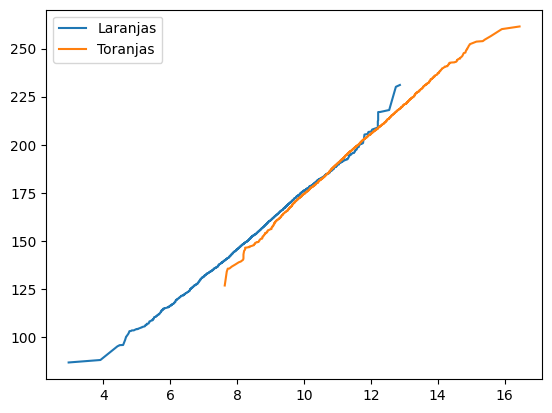

In [6]:
# importando matplotlib para fazer os gráficos
import matplotlib.pyplot as plt

# Fazendo o gráfico do peso pelo diâmetro
plt.plot(diametros_laranjas, pesos_laranjas)
plt.plot(diametros_toranjas, pesos_toranjas)
plt.legend(['Laranjas', 'Toranjas'])

Como é possível observar, em ambos os casos o peso é diretamente proporcional ao diâmetro. \\
Existe um grande intervalo em que existem toranjas e laranjas com o mesmo peso e diâmetro. Porém, existem toranjas maiores que quaisquer laranjas e existem laranjas menores que quaisquer toranjas

# Aplicando regressão linear

Utilizando regressão linear para as Laranjas e para as Toranjas \\
A fórmula que será utilizada é a dos mínimos quadrados

In [7]:
# Para as laranjas
YL = pesos_laranjas
XL = diametros_laranjas
nL = len(pesos_laranjas)

# Para as toranjas
YT = pesos_toranjas
XT = diametros_toranjas
nT = len(pesos_toranjas)

In [8]:
# Aplicando a fórmula para encontrar A
# Aplcando a fórmula para Laranjas
aL = (nL*np.sum(XL*YL) - np.sum(XL) * np.sum(YL)) / (nL * np.sum(XL**2) - np.sum(XL)**2)

# Aplcando a fórmula para Toranjas
aT = (nT*np.sum(XT*YT) - np.sum(XT) * np.sum(YT)) / (nT * np.sum(XT**2) - np.sum(XT)**2)

# Visualizando os valores
print('Coeficiente angular das laranjas')
print(aL)
print('Coeficiente angular das Toranjas')
print(aT)

Coeficiente das laranjas
14.7997452319846
Coeficiente das Toranjas
15.70884459360376


In [15]:
# Aplicando a fórmula para encontrar B
# Para as laranjas
bL = np.mean(YL) - aL*np.mean(XL)

# Para as toranjas
bT = np.mean(YT) - aT*np.mean(XT)

# Visualizando os valores
print('Coeficiente linear das laranjas')
print(bL)
print('Coeficiente linear das Toranjas')
print(bT)

Coeficiente linear das laranjas
27.38560381218413
Coeficiente linear das Toranjas
17.007102876817726


In [10]:
# criando a nossa reta para laranjas
yL = aL*XL + bL

# criando a nossa reta para as toranjas
yT = aT*XT + bT

In [11]:
# Calculando a diferença do Y real para o y estimado para as laranjas
print(np.linalg.norm(pesos_laranjas-yL))

# Calculando a diferença do Y real para o y estimado para as toranjas
print(np.linalg.norm(pesos_toranjas-yT))

46.32284523962465
44.60533206058902


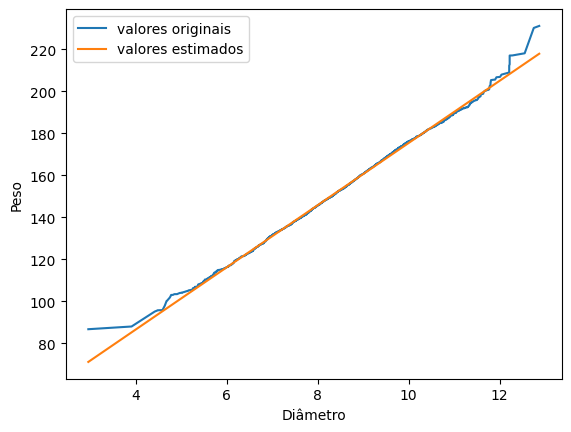

In [12]:
# Visualizando a reta no gráfico das laranjas
plt.plot(XL, YL, label="valores originais")
plt.plot(XL,yL, label="valores estimados")
plt.legend()
plt.xlabel("Diâmetro")
plt.ylabel("Peso")
plt.show()

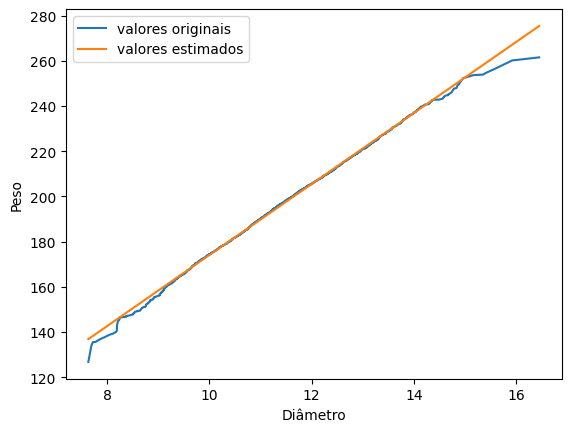

In [13]:
# Visualizando a reta no gráfico das toranjas
plt.plot(XT, YT, label="valores originais")
plt.plot(XT,yT, label="valores estimados")
plt.legend()
plt.xlabel("Diâmetro")
plt.ylabel("Peso")
plt.show()

# Utilizando Números Aleatórios no Coeficiente Angular
Gerando números aleatórios para a criação de coeficientes angulares

In [25]:
# Selecionando uma semente
np.random.seed(16)
# Criando os coeficientes angulares
coef_angulares_laranja = np.random.uniform(low = 12, high= 18, size = 100)
coef_angulares_toranja = np.random.uniform(low = 12, high= 18, size = 100)

# O coeficiente linear será o mesmo gerado anterioremente

In [26]:
# Econtrando um coeficiente angular para as laranjas e toranjas
# definindo as normas
normas_laranja = np.array([])
normas_toranja = np.array([])
for i in range(len(coef_angulares_laranja)):
  normas_laranja = np.append(normas_laranja, np.linalg.norm(YL-(coef_angulares_laranja[i]*XL+bL)))
  normas_toranja = np.append(normas_toranja, np.linalg.norm(YT-(coef_angulares_toranja[i]*XT+bT)))

In [27]:
# imprimindo o arranjo de normas das laranjas
print('Valores das normas das laranjas:')
print(normas_laranja)

print('Valores dos coeficientes angulares das laranjas: ')
print(coef_angulares_laranja)

Valores das normas das laranjas:
[ 885.71612375  210.67281608  309.10735799 1531.09610811  387.70175411
  886.47891863  808.65755704 1101.97441968 1441.27322452 1724.99426321
  355.82619025 1413.41702131  931.75888304 1121.14756742  787.75895194
  631.04679357  837.27206582   47.11054759  915.5882996    85.58447611
 1257.62114293 1640.24536042  365.79345142   50.30303957  554.66028701
 1539.76595367 1039.97641282  282.42501533 1093.52502159 1177.99750183
 1434.38307316  703.4055372  1503.12952708  795.22449467   96.44933689
   46.59050956  708.27856675  813.15924183  740.41679271 1655.07906919
 1108.42972526 1271.32539718 1189.46803138  407.51143697  460.15934477
  853.32242102  975.19658463  710.81144729 1855.23413643  914.25658415
  403.30173947 1629.93153508  547.80831442  859.89241674 1003.32594008
  430.06675422  175.33028942  883.15881821 1837.76556181 1249.15552684
  138.7091508  1785.74125563 1523.26221159  968.57812261  761.2689514
  224.316919    367.74465623  932.86522299  7

In [28]:
# imprimindo o arranjo de normas das toranjas
print('Valores das normas das toranjas:')
print(normas_toranja)

print('Valores dos coeficientes angulares das toranjas: ')
print(coef_angulares_toranja)

Valores das normas das toranjas:
[ 888.08099235 1543.70468594  433.58769522 1719.3529676  2147.06652756
  188.5516026   999.37681342 1419.61857284   59.47830427 2230.26368774
 1648.32842839  153.20472674 2480.06549035 1707.67502189 3017.48420467
 1364.0912464  1529.346162   1361.56688477  958.6424192   258.77578308
   55.96381365  214.18935092  545.74526985   93.7197484  2497.24125054
 1631.51621449 2863.51375116 2552.23418979 1121.28994528   52.80615519
  404.05425403  335.37303987  947.39684522  136.01856069 2060.36101411
  761.19268383 1340.17850948 1138.23639428 1356.35862479 1732.1866183
 1933.31078531  108.7705138  2354.69257284 2393.65421485  168.27275233
  488.16867413 2540.09702192  203.82208961  998.01143466 2365.32227313
  494.2704481  2710.29861752 1372.14041265 2564.82510519 1199.12374176
  590.91649587 2466.54233621  372.15723561 1724.27631295 1817.54720994
  223.4547651   249.37572031 1355.40729832 2450.80126837  363.32994303
  250.19559652 1452.07264858   60.21248063  6

In [29]:
# encontrando a menor norma para utilizar como coef angular das laranjas
local_menor = np.argmin(normas_laranja)
menor_norma = normas_laranja[local_menor]
# informando qual é a menor norma encontrada
print('Menor norma encontrada para laranjas')
print(menor_norma)

print('Coeficiente que gerou a menor norma para laranjas: ')
# Salvando em uma variável
coeficiente_aleatorio_laranja = coef_angulares_laranja[local_menor]
print(coeficiente_aleatorio_laranja)

Menor norma encontrada para laranjas
46.59050955758586
Coeficiente que gerou a menor norma para laranjas: 
14.807976884279768


In [30]:
# encontrando a menor norma para utilizar como coef angular para as toranjas
local_menor = np.argmin(normas_toranja)
menor_norma = normas_toranja[local_menor]
# informando qual é a menor norma encontrada
print('Menor norma encontrada para toranjas')
print(menor_norma)

print('Coeficiente que gerou a menor norma para toranjas: ')
# Salvando em uma variável
coeficiente_aleatorio_toranja = coef_angulares_toranja[local_menor]
print(coeficiente_aleatorio_toranja)

Menor norma encontrada para toranjas
52.80615518603158
Coeficiente que gerou a menor norma para toranjas: 
15.674212523748043


## Plotando as regressões geradas com coeficientes angulares aleatórios
Gráfico das laranjas

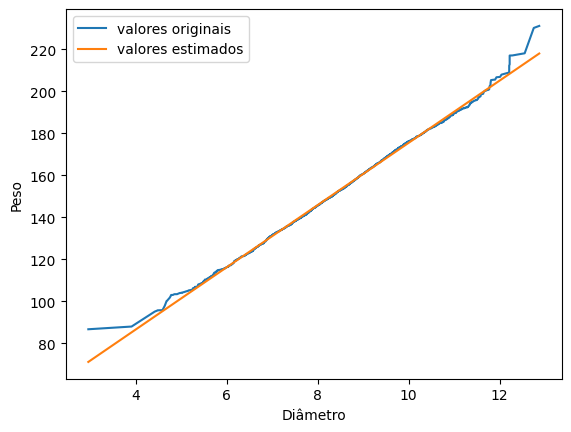

In [31]:
# Visualizando a reta no gráfico das laranjas
plt.plot(XL, YL, label="valores originais")
plt.plot(XL,(coeficiente_aleatorio_laranja*XL + bL), label="valores estimados")
plt.legend()
plt.xlabel("Diâmetro")
plt.ylabel("Peso")
plt.show()

Gráfico das Toranjas

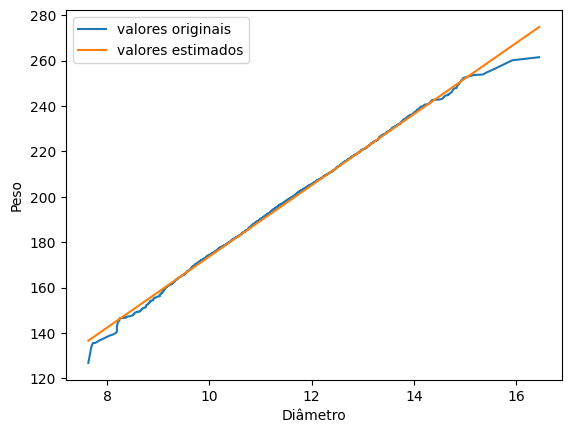

In [32]:
# Visualizando a reta no gráfico das toranjas
plt.plot(XT, YT, label="valores originais")
plt.plot(XT,(coeficiente_aleatorio_toranja*XT + bT), label="valores estimados")
plt.legend()
plt.xlabel("Diâmetro")
plt.ylabel("Peso")
plt.show()

Foi possível, por meio de números gerados pseudo-aleatoriamente, gerar linhas de regressão bastante satisfatórias.